In [2]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-0

In [3]:
a, b, x0, y0, R, xc, yc, r = 4.0, 4.0, 0.0, 0.0, 1.0, 0.0, 0.0, 4.0
vertices = [(a*1.0, b*1.0), (-a*1.0, b*1.0), (-a*1.0, -b*1.0), (a*1.0, -b*1.0), (a*1.0, b*1.0)]
pplg = transform(lambda x, y, z=None: (x-x0, y-y0), LinearRing(vertices))
delta = 0.4

Solution

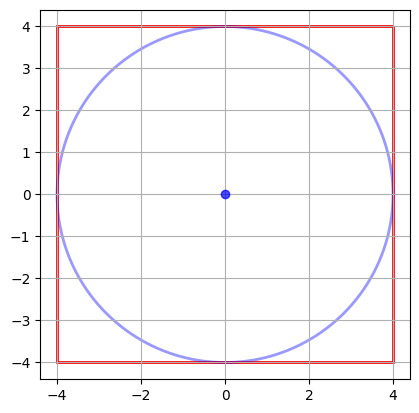

In [4]:
ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
plg = LinearRing(ppts)

cpts = []
n = 10000
for i in range(n):
    phi = (i / n)*2.0*pi
    cpts.append(Point(r*cos(phi), r*sin(phi)))
cplg = LinearRing(cpts)

plot_line(plg, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

plt.autoscale()
plt.show()

In [5]:
n = 1000

cpts = []
opts = []
ang = []

maxdst = 0.0
maxi = 0
for i in range(n):
    phi = (i / n)*2.0*pi
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = plg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    opts.append(opt)
    ang.append(phi)

In [6]:
eps = 1e-6
steps = int(maxdst/delta)
trcpts = []
trcang = []
trcplgs = []
trcptss = []

for j in range(1, steps+1):
    rad = sqrt((opts[maxi].x-cpts[maxi].x)**2+(opts[maxi].y-cpts[maxi].y)**2)
    x = cpts[maxi].x+((opts[maxi].x-cpts[maxi].x)/rad)*delta*j
    tau = (x/r-1.0/sqrt(2))/(1.0-1.0/sqrt(2))
    s = 2*sqrt((3.0-2*sqrt(2))*tau**2-(2.0-2*sqrt(2))*tau)/((1.0-(1.0-sqrt(2))*tau)**2)

    trcpt = []
    for i in range(len(ang)):
        radius = r*sqrt(2)*sqrt(1.0-sqrt(1.0-s**2 * (sin(2*ang[i]+eps))**2))/(s*abs(sin(2*ang[i]+eps)))
        trcpt.append(Point(radius*cos(ang[i]), radius*sin(ang[i])))
        trcpts.append(Point(radius*cos(ang[i]), radius*sin(ang[i])))
        trcang.append(ang[i])
    trcptss.append(trcpt)
    trcplgs.append(LinearRing(trcpt))

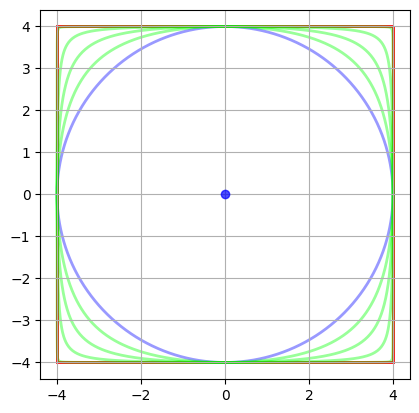

In [7]:
plot_line(plg, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

for j in range(steps):
    plot_line(trcplgs[j], add_points=False, color=(0,1,0), alpha=0.4)

plt.autoscale()
plt.show()

In [8]:
points = []
traces = []

trcptss.reverse()

for item in trcptss:
    trcpoints = []

    for i in reversed(range(len(item))):
        radius = sqrt(item[i].x**2+item[i].y**2)
        trcpoints.append(Point(item[i].x*(1.0+R/radius), item[i].y*(1.0+R/radius)))

    points.append(trcpoints)
    trct = LinearRing(trcpoints)
    traces.append(trct)

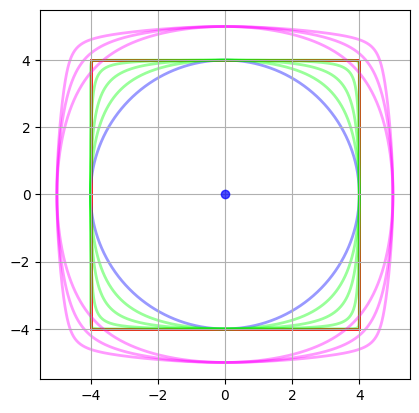

In [9]:
plot_line(plg, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)
for j in range(steps):
    plot_line(trcplgs[j], add_points=False, color=(0,1,0), alpha=0.4)
for j in range(1, steps):
    plot_line(traces[j], add_points=False, color=(1,0,1), alpha=0.4)

plt.autoscale()
plt.show()

In [10]:
ln = LineString([(0.0, 0.0), (0.0, 100.0)])
x = []
y = []
n = 1000
for j in range(steps-1):
    for i in range(n):
        angle = i*360.0/n+360.0*j
        yval = affinity.rotate(traces[j], angle, origin=Point(0.0,0.0)).intersection(ln).y
        x.append(angle)
        y.append(yval)

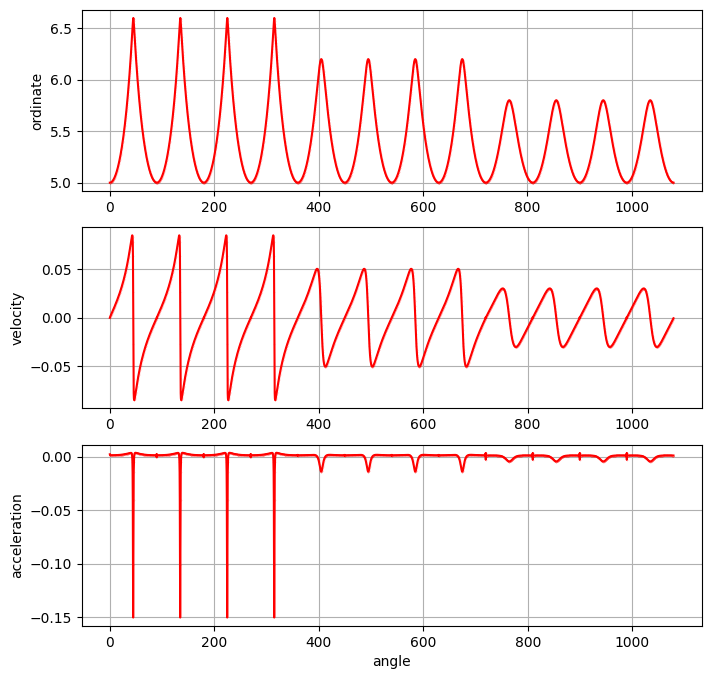

In [11]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]

fig, axs = plt.subplots(3, 1)
fig.set_size_inches(8.0, 8.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_xlabel('angle')
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

plt.show()